# Informe Tarea 2 Grupo 2
## Nombre Alumnos: Ignacio Brito, Jos√© Tom√°s De la Pe√±a, √çtalo Salazar, Alex Villarroel

## P1 - Programaci√≥n del Problema Directo
Se provee de una carpeta ajuste_ortogonal_recta que deber√° copiar en la carpeta del paquete de python
desarrollado en la Tarea 1, es decir al interior de GF7013/models/. En este m√≥dulo se encuentra la definici√≥n
de la recta param√©trica y el prototipo de una clase forward que permitir√° calcular el modelo directo.
En un intento por generalizar los c√≥digos de muestreo que se utilizan posteriormente, se definir√° un requerimiento
que debe cumplir la clase forward (que implementa el modelo directo para cualquier problema y no s√≥lo para el
ajuste ortogonal a la recta): que un objeto que sea instancia de la clase forward debe implementar la funci√≥n
miembro eval(m) donde m es el vector de par√°metros del modelo.
Para el problema del ajuste ortogonal de la linea recta, se tiene m = [a, Œ∏]‚ä§, donde a es la distancia de la recta
al origen y Œ∏ define la orientaci√≥n de la recta en sentido anti-horario con respecto al eje x (ver apunte que define
el problema de ajuste ortogonal a la recta).
Luego se pide:

### P1.1 Completar la funci√≥n eval(self, m) de la manera m√°s concisa posible. Para ello utilice el paquete recta que se provee.
-----------------------------------------------------------------------------------------------
La funci√≥n eval se calcul√≥ calcula la predicci√≥n de los par√°metros del modelo, es decir, dados los valores de las observaciones (incluyendo los sigmas), y los par√°metros de modelo, en este caso a y el √°ngulo $\theta$, retorne los valores de la estimaci√≥n del problema directo

Este m√©todo se implement√≥ de la siguiente manera:

```python
class forward(object):
# 
# definici√≥n de la clase ...
# m√©todo eval
    def eval(self, m):
        """
        Computes a prediction of the model parameters (see description in this
        module docstring).
        - m = np.array([a, theta]) with theta in degrees (both float quantities). 
          -> a is the distance between straight line to origin of coordinate system and 
          -> theta is the orientation of the straight line measured counter-clockwise 
            measured from x axis. 
        """
        # Extract model parameters
        a, theta = m[0], m[1]

        # calculate the predicted points in the straight line
        dpred = recta.calc_xy_pred(a, theta, self.x_obs, self.y_obs)

        # dpred incluyendo el c√°lculo de los sigma

        return dpred


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

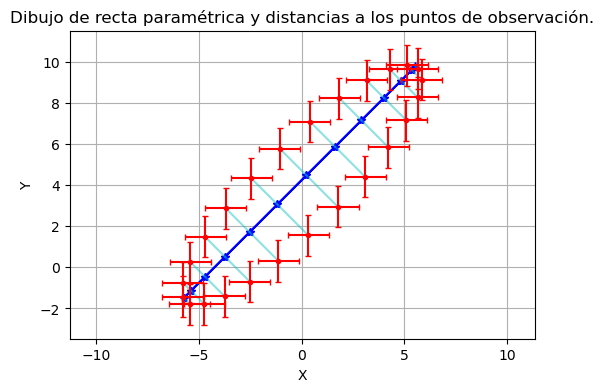

In [2]:
### P1.2 - Ejemplo de modelo directo


from GF7013.models.ajuste_ortogonal_recta.forward import forward
import numpy as np
from GF7013.bin.Tarea2.P1.datos import obtener_datos_elipses
from GF7013.models.ajuste_ortogonal_recta import recta
N = 25
semi_eje_mayor = 8
semi_eje_menor = 2
alpha = 45
delta_x = 0
delta_y = 4
desviacion_estandar_x = 1.0
desviacion_estandar_y = 1.0
# valores de d
x_obs, y_obs, sigma_x, sigma_y = obtener_datos_elipses(
                                        N = N,
                                        a = semi_eje_mayor,
                                        b = semi_eje_menor,
                                        alpha = alpha,
                                        deltax = delta_x,
                                        deltay = delta_y,
                                        sigma_x = desviacion_estandar_x,
                                        sigma_y = desviacion_estandar_y)
# valores de m 
a = 3
theta = 45 # grados sexagesimales despues de hacer P1.1)
# se define m como un array
m = np.array([a, theta]) # modelo de recta a graficar.

directo = forward(x_obs=x_obs, y_obs=y_obs, sigma_x=sigma_x, sigma_y=sigma_y)
# le calculamos las predicciones de la recta
# s es el vector con la proyeccion ortogonal de cada punto en la recta.
# s = np.array([np.array([x_obs[i], y_obs[i]]).dot(t) for i in range(0, len(x_obs))])
x_pred, y_pred, s = directo.dpred(m)

# plotear los resultados
import matplotlib.pyplot as plt
fig = plt.figure(1)
fig.clear()
fig.set_size_inches((6, 4))
ax = fig.add_subplot(111)
# en el comando siguiente, si el color es 'none' no se grafica el elemento.
# recta.plot_recta(ax, *m, x_obs=x_obs, y_obs=y_obs, color_dist='c', color='b')
ax.plot(x_pred, y_pred, 'b-*', label='Recta param√©trica')
ax.plot([x_pred, x_obs],
        [y_pred, y_obs],
        linestyle = '-', 
        color = 'c', 
        alpha = alpha/100)
ax.errorbar(x=x_obs, y=y_obs, xerr=sigma_x, yerr=sigma_y, fmt='.r', capsize=2)
ax.axis('equal')
ax.grid('on')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Dibujo de recta param√©trica y distancias a los puntos de observaci√≥n.')
fig.canvas.draw()
plt.show()

##  P2. Modelaci√≥n Inversa usando M√©todos Bayesianos: A priori's y funci√≥n  $f_{prior}(m)$

### P2.1. Densidad volum√©trica a priori para los par√°metros del modelo fprior(m)
Para la densidad volum√©trica a priori de los par√°metros del modelo fprior(m), se asumir√° el estado homog√©neo de informaci√≥n. Para ello, se considera que los par√°metros del modelo son ambos par√°metros cartesianos, por lo que la fdp a priori para m ser√° la de una distribuci√≥n uniforme.


Se debe definir un rango de valores posibles para el par√°metro a que sea lo suficientemente grande, por ejemplo, ¬±2 veces el m√°ximo de las normas de $d^{obs}_k$ (que son los datos observados a ajustar con la recta, o los datos sint√©ticos a usar en esta tarea).

Adem√°s, se define el rango de posibles valores de Œ∏ en el intervalo $[‚àí180, 180[$ grados sexagesimales.

En la Tarea 1, en GF7013/probability_functions/pdf/pdf_uniform_nD.py programaron una
clase pdf_uniform_nD, que permite calcular la verosimilitud (i.e., sin normalizar) - y su logaritmo natural - de una distribuci√≥n uniforme de n dimensiones.

En la carpeta Tarea2/tests escriba un script test_fprior.py que cree una instancia de pdf_-
uniform_nD que represente fprior (m) para el caso del problema del ajuste a la recta y genere 1E5 muestras de fprior(m). Graficar el histograma conjunto de (a, Œ∏) ‚Äì use matplotlib.pyplot.hist2d ‚Äì y los histogramas marginales para cada uno de los dos par√°metros. Recuerde escoger bien el n√∫mero o tama√±o de casilleros del histograma para que luzca como una distribuci√≥n uniforme.

----------------------------------Resoluci√≥n -------------------------------------------------------

Para la resoluci√≥n del problema, en la funci√≥n test_fprior se defini√≥ la funci√≥n histogram_p2_1 que realiza el histograma 2d solicitado con sus respectivos histogramas marginales para cada par√°metro. 

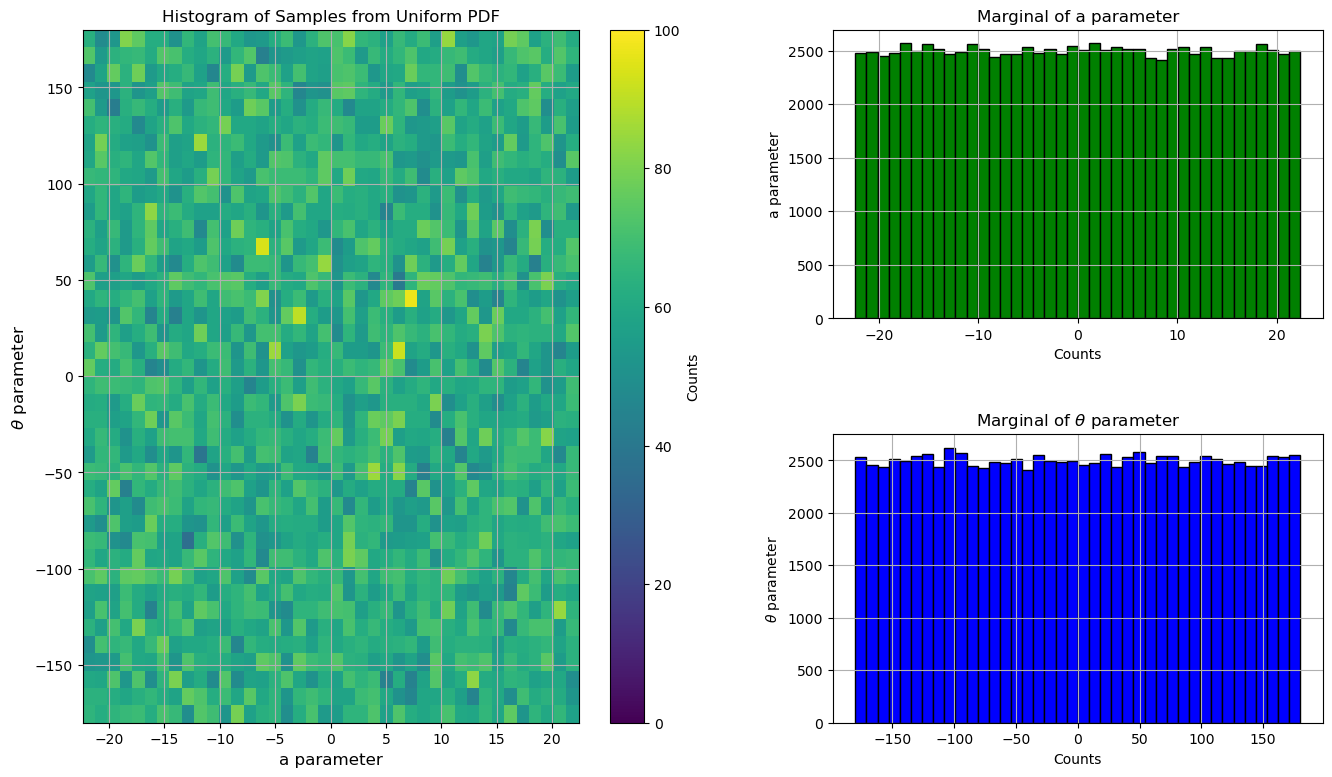

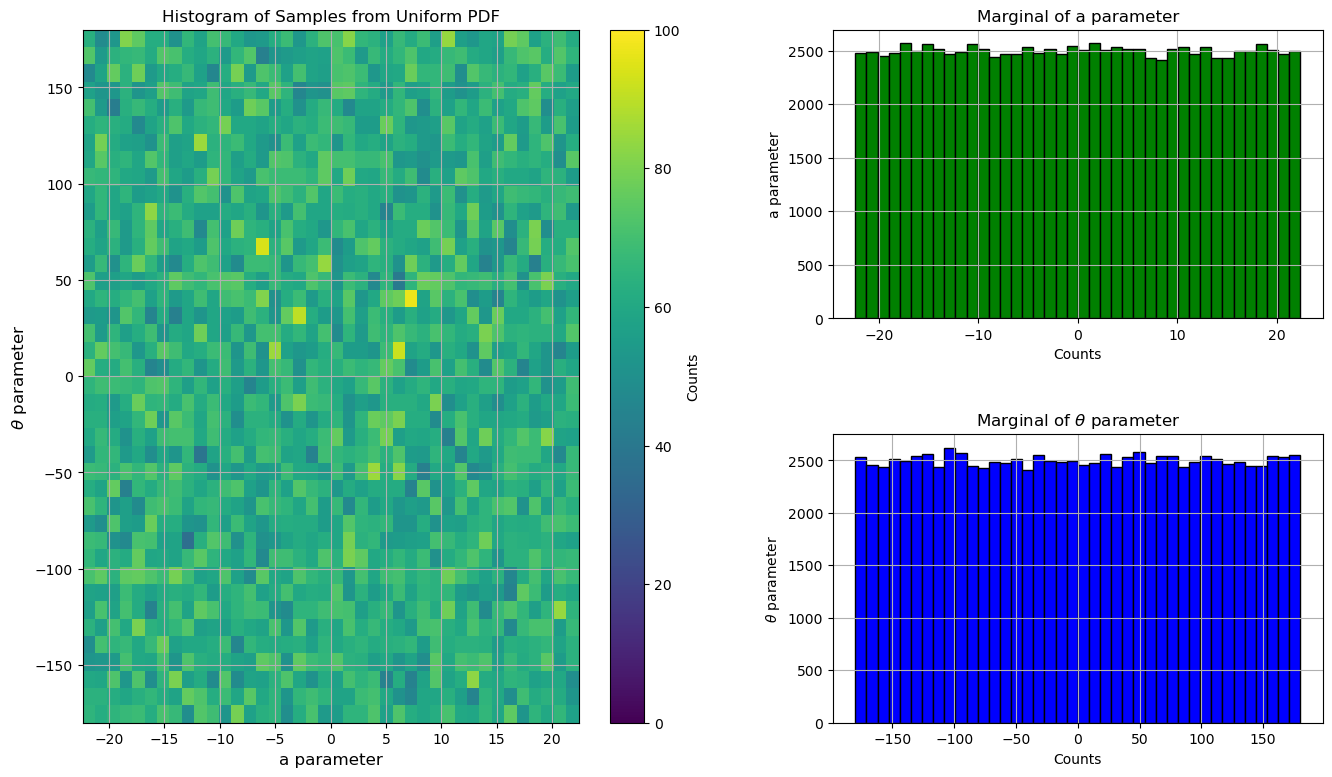

In [3]:
from GF7013.probability_functions.pdf import pdf_uniform_nD
norm_dobs = np.sqrt((x_obs**2+y_obs**2))
#
ll_a, ul_a = -2*np.max(norm_dobs), 2* np.max(norm_dobs)
ll_theta, ul_theta = -180,180 
#
lower_lim = np.array([ll_a,ll_theta])
upper_lim = np.array([ul_a,ul_theta])
par = {'lower_lim': lower_lim,'upper_lim':upper_lim}
pdf_uniforme = pdf_uniform_nD(par)
#
N_samples = 1e5
#
LogOfZero = None
rng = np.random.default_rng(42)  # Para reproducibilidad
f_prior = pdf_uniform_nD(par, LogOfZero=LogOfZero, rng=rng) 
samples = f_prior._draw(N_samples)
# Ahora llamamos a la funci√≥n para plotear que se cre√≥ en test_fprior.py
# podr√≠amos agregarla a utils
import GF7013.bin.Tarea2.tests.test_fprior as test_fprior
fig = test_fprior.histogram_p2_1(samples,0,100);
plt.show();


### P2.2 Funci√≥n de Verosimilitud $\mathcal{L}(m)$

Para poder definir la funci√≥n de verosimilitud de un modelo $\mathcal{L}(m)$ primero se definir√° la distribuci√≥n a priori
para la variable de inter√©s. En este caso, como se desea hacer un ajuste ortogonal de una recta, se quiere encontrar
modelos que minimicen la distancia a los datos. Luego, la variable sobre la cual se debe definir informaci√≥n a priori
corresponde a la distancias $\Delta_k$ entre los pares ordenados observados y la recta (ver archivo pdf adjunto con la tarea y explicado por el profesor auxiliar).

En esta tarea se asume que los errores de dichas distancias son independientes y que siguen una distribuci√≥n normal. Como se quiere que dichas distancias sean lo m√°s peque√±as posibles, se propone utilizar una distribuci√≥n
normal, con media nula y varianzas $\sigma^2_{\Delta_k}$ con fdp:

$$ \rho_\Delta(\mathbf{\Delta,\sigma^2_{\Delta_k}}) =  \nu e ^{-\frac{1}{2}\sum_{k=1}^N \frac{\Delta^2_k}{\sigma^2_{\Delta_k}}}  $$

Donde $\nu$ es una constante de normalizaci√≥n.

Luego, si para un modelo $\mathbf{m}$ dado, se calcula las distancias $\mathbf{\Delta(m)}$ y la bariaza de dichas distancias $\mathbf{\sigma^2_\Delta(m)}$, la verosimilitud de dicho modelo se puede calcular como:

$$ùìõ(\mathbf{m}) = \rho_\Delta(\mathbf{\Delta(m),\sigma^2_{\Delta}(m)}) $$

La funci√≥n de verosimilitud se encuentra programada en GF7013/probability_functions/likelihood_function.py. Esta recibe una instancia de modelo directo (forward) y una instancia de la fdp a priori de los datos (pdf_data). Se recomienda leer el c√≥digo de la funci√≥n de verosimilitud antes de proseguir con el desarrollo
de la tarea.

## P2.2.1 Verificaci√≥n de la programaci√≥n de $\rho_\Delta$

La funci√≥n de probabilidad a priori para las observaciones se asumir√° como una distribuci√≥n Normal Multivariada. En la Tarea 1, se program√≥ la clase pdf_normal.py en el m√≥dulo GF7013/probability_functions/pdf_normal.py. En esta parte de la tarea debe cerciorarse de que dicha clase funcione, y es una oportunidad para arreglar cualquier error que haya tenido en el desarrollo de la Tarea 1.

Para verificar su programaci√≥n de pdf_normal.py, cree un script en el m√≥dulo Tarea2/tests/test_pdf_normal.py que genera 100.000 muestras de una distribuci√≥n normal multivariada con media mu = np.array([-1, 4]) y matriz de covarianza cov = np.array([[2, 1], [1, 4]]) y que luego verifique que el promedio y matriz de covarianza calculados con las muestras sea similar a mu y cov anteriores, respectivamente.

Adem√°s, se pide hacer un histograma 2D de las muestras de la fdp conjunta y hacer histogramas de las 2 fdp marginales.

Sample Mean: [-1.00312805  3.99973846]
Sample Covariance:
 [[1.99495575 0.99220652]
 [0.99220652 4.0409389 ]]


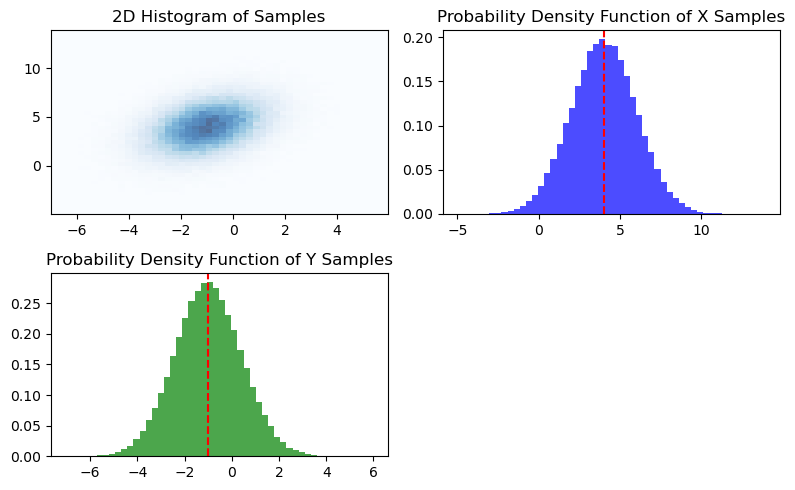

In [4]:
from GF7013.probability_functions.pdf import pdf_normal

N_samples = 1e5
mu = np.array([-1, 4])
cov = np.array([[2, 1], [1, 4]])
rng = np.random.default_rng(42)  # Para reproducibilidad
par = {'mu': mu, 'cov': cov}

f_prior = pdf_normal(par, rng=rng)
samples = f_prior._draw(N_samples)

# Verificar covarianza y media de las muestras
sample_mean = np.mean(samples, axis=1)
sample_cov = np.cov(samples)
print("Sample Mean:", sample_mean)
print("Sample Covariance:\n", sample_cov)

# Graficar las muestras
fig, ax = plt.subplots(2, 2, figsize=(8, 5))
ax[0, 0].hist2d(samples[0], samples[1], bins=50, density=True, cmap='Blues', alpha=0.7)
ax[0, 0].set_title('2D Histogram of Samples')
ax[0, 1].hist(samples[1], bins=50, density=True, alpha=0.7, color='blue')
ax[0, 1].axvline(mu[1], color='red', linestyle='--', label='Mean')
ax[0, 1].set_title('Probability Density Function of X Samples')
ax[1, 0].hist(samples[0], bins=50, density=True, alpha=0.7, color='green')
ax[1, 0].axvline(mu[0], color='red', linestyle='--', label='Mean')
ax[1, 0].set_title('Probability Density Function of Y Samples')
fig.delaxes(ax[1, 1])
plt.tight_layout()
plt.show()

### P2.2.2. Verificaci√≥n de la programaci√≥n de L(m)
Para verificar la programaci√≥n de L(m), se utilizar√° el m√©todo de Grid-Search para resolver el problema inverso (ver apuntes del curso GF5013), esto se puede hacer ya que solo hay dos par√°metros involucrados. Para ello, use los datos sint√©ticos que se proveen en GF7013/bin/Tarea2/P1/P1b.py y cree un script en el m√≥dulo
Tarea2/tests/test_Likelihood.py.
En dicho script,

1. Defina un conjunto de valores de a y Œ∏ (use np.linspace) que cubran el rango de valores con probabilidad
no nula de $f_{prior}(m)$. Luego, cree un conjunto de modelos m con todas las combinaciones posibles de a y
Œ∏.
2. Cree una instancia de la clase ensemble, que se encuentra definida en GF7013/model_parameters/
ensemble.py, guarde ah√≠ el conjunto de modelos y llene las variables fprior, like, y f con las verosimilitudes
correspondientes a cada uno de esos modelos (i.e., use la funci√≥n likelihood de los objetos definidos para
$f_{prior}(m)$  y $\mathcal{L}(m)$)
3. Cree otra instancia de la clase ensemble, que se encuentra definida en GF7013/model_parameters/
ensemble.py, guarde ah√≠ el conjunto de modelos y llene las variables fprior, like, y f con el logaritmo
natural de las verosimilitudes correspondientes a cada uno de esos modelos (i.e., use la funci√≥n log_likelihood de los objetos definidos para $f_{prior}(m)$  y $\mathcal{L}(m)$)

4. Haga un gr√°fico 2D con colores (puede usar matplotlib.pyplot.pcolor o matplotlib.pyplot.scatter, en el segundo teniendo cuidado con el tama√±o de los s√≠mbolos) para los valores de verosimilitud fprior, like, y f; y del logaritmo natural de la verosimilitud fprior, like, y f (son 6 gr√°ficos de colores en total)

#### Resoluci√≥n
1. Definir todas las combinaciones de valores de a y de $\theta$ es posible realizando un mallado 2d con np.meshgrid(), y luego uniendo ambos parametros aplanando cada componente del mallado. Los limites de a fueron definidos en el enunciado como $\pm 2 \cdot max(|d_{k}^{obs}|)$, mientra que $\theta$ de -180 a 180 grados hexadecimales



Text(0, 0.5, '$\\theta$ values')

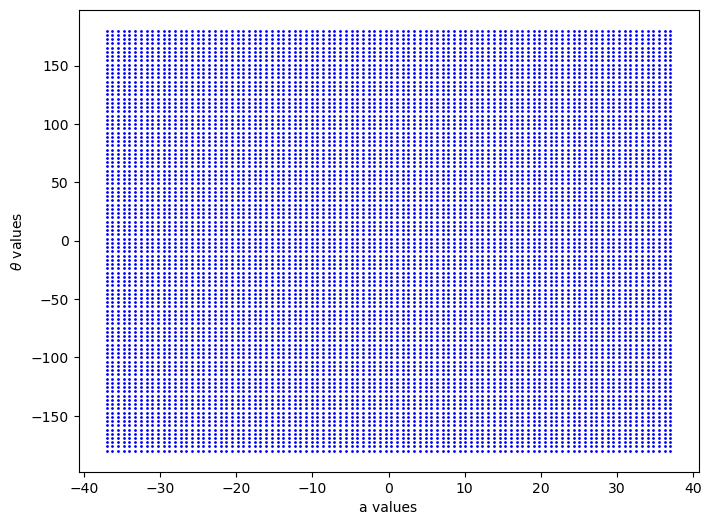

In [5]:
from GF7013.bin.Tarea2.P1.datos import obtener_datos_elipses
from GF7013.model_parameters.ensemble import ensemble
from GF7013.probability_functions.pdf import pdf_uniform_nD,pdf_normal
from GF7013.probability_functions.likelihood.likelihood_function import likelihood_function
from GF7013.models.ajuste_ortogonal_recta.forward import forward
from GF7013.models.ajuste_ortogonal_recta.recta import calc_dist_sigma
# Generar datos sinteticos
N = int(70)
semi_eje_mayor = 10
semi_eje_menor = 2
alpha = -45
delta_x = 0
delta_y = -10
desviacion_estandar_x = 1.0
desviacion_estandar_y = 0.5

x_obs, y_obs, sigma_x, sigma_y = obtener_datos_elipses(
                                        N = N,
                                        a = semi_eje_mayor,
                                        b = semi_eje_menor,
                                        alpha = alpha,
                                        deltax = delta_x,
                                        deltay = delta_y,
                                        sigma_x = desviacion_estandar_x,
                                        sigma_y = desviacion_estandar_y)

# definici√≥n de los par√°metros
norm_dobs = np.sqrt((x_obs**2+y_obs**2))
#
ll_a, ul_a = -2*np.max(norm_dobs), 2* np.max(norm_dobs)
ll_theta, ul_theta = -180,180 
#
lower_lim = np.array([ll_a,ll_theta])
upper_lim = np.array([ul_a,ul_theta])

# Valores de la grilla

theta_values = np.linspace(ll_theta, ul_theta, 100)
a_values = np.linspace(ll_a, ul_a, 100)

Nmodels = len(theta_values) * len(a_values)
Npar=2

a_grid,theta_grid = np.meshgrid(a_values,theta_values)
m_values=grid = np.stack([a_grid.ravel(), theta_grid.ravel()], axis=1)
# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(a_grid, theta_grid, s=1, color='blue')
ax.set_xlabel('a values')
ax.set_ylabel(r'$\theta$ values')

2. Una vez definidos los m posibles, se procede a establecer a priori como la fdp uniforme con los par√°metros de limite inferior y superior establecidos anteriormente, utilizando una semilla para su reproductibilidad. Posterior a ello, se invoca una instancia de forward con los datos sint√©ticos. El likelihood se realiza a partir de lo establecido en el enunciado, con media nula y varianza $\sigma^2_{\Delta_k}$

In [6]:
par = {'lower_lim': lower_lim, 'upper_lim': upper_lim}
LogOfZero = None
rng_uni = np.random.default_rng(66)
f_prior = pdf_uniform_nD(par=par, LogOfZero=LogOfZero, rng=rng_uni)

# Forward model
forward_model = forward(x_obs, y_obs, sigma_x, sigma_y)

# Likelihood function
LogOfZero = None
rng = np.random.default_rng(777)

likelihood=np.zeros(Nmodels)
likelihood_f_prior=np.zeros(Nmodels)
likelihood_f_posterior= np.zeros(Nmodels)

# Log likelihood
loglikelihood = np.zeros(Nmodels)
loglikelihood_f_prior = np.zeros(Nmodels)
loglikelihood_f_posterior = np.zeros(Nmodels)

mu = np.zeros(N)
cov = np.eye(N)

par = {'mu': mu, 'cov': cov}
likelihood_func = likelihood_function(forward=forward_model, pdf_data=pdf_normal(par=par, rng=rng))

for i, model in enumerate(m_values):
    likelihood_f_prior[i] = f_prior._likelihood(model)
    likelihood[i] = likelihood_func.likelihood(model)
    likelihood_f_posterior[i] = likelihood_f_prior[i] * likelihood[i]
    
    # Log likelihood
    loglikelihood_f_prior[i] = f_prior._log_likelihood(model)
    loglikelihood[i] = likelihood_func.log_likelihood(model)
    loglikelihood_f_posterior[i] = loglikelihood_f_prior[i] + loglikelihood[i]

# Create ensemble objects
ensamble = ensemble(Npar = Npar, Nmodels = Nmodels, use_log_likelihood=False)

ensamble.fprior = likelihood_f_prior
ensamble.like = likelihood
ensamble.f = likelihood_f_posterior

ensamble_log = ensemble(Npar=Npar,Nmodels=Nmodels,use_log_likelihood=True)

ensamble_log.fprior = loglikelihood_f_prior
ensamble_log.like = loglikelihood
ensamble_log.f = loglikelihood_f_posterior

Floating point overflow when calculating the normalization constant.
Use log_pdf or (log) Likelihood values instead of pdf.


3. El loglikelihood est√° inclu√≠do en el c√≥digo anterior, solamente se gener√≥ un ensamble distinto con las caracter√≠sticas del loglikelihood
4. El mallado generado con anterioridad nos sirve para hacer los plots con pcolormesh

6


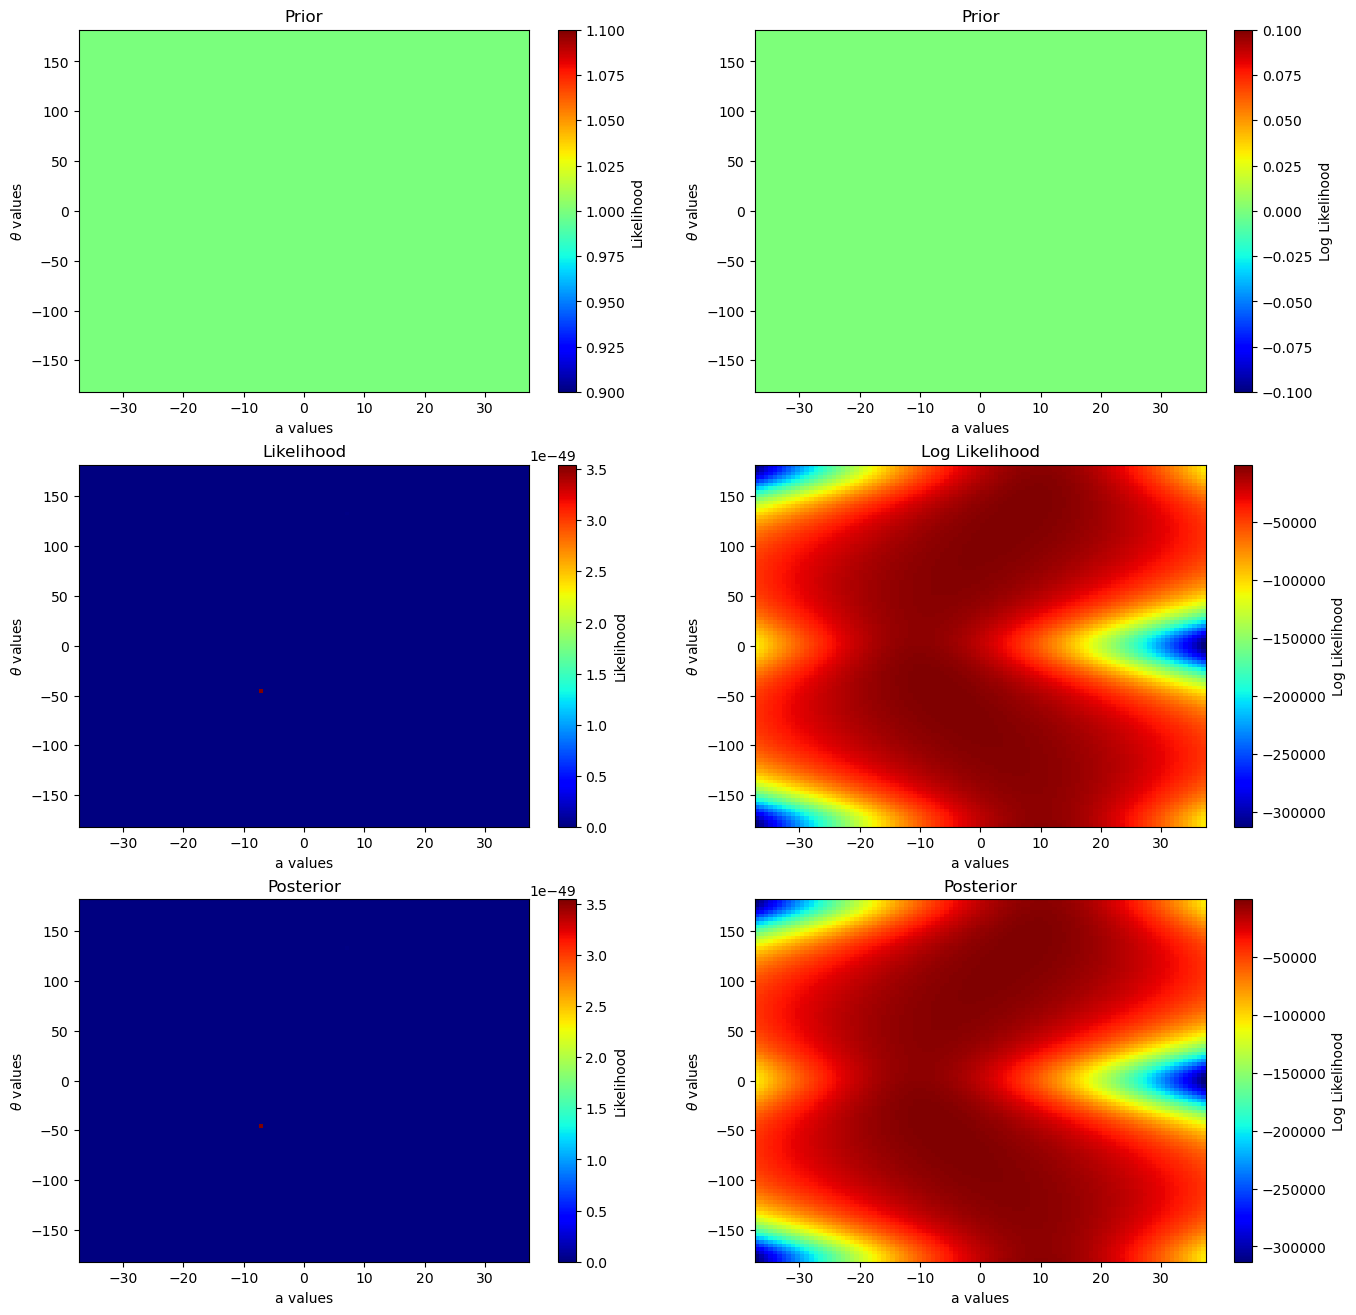

In [7]:
# plot with pcolormesh, using a_grid,theta_grid
fig,axs = plt.subplots(3,2, figsize=(16, 16))
axs = axs.flatten()
lists = [ensamble.fprior, ensamble_log.fprior,
         ensamble.like, ensamble_log.like,
         ensamble.f, ensamble_log.f]
cbarlabels = ['Likelihood','Log Likelihood','Likelihood', 'Log Likelihood','Likelihood', 'Log Likelihood']
print(len(cbarlabels))
for i, data in enumerate(lists):
    pcm = axs[i].pcolormesh(a_grid, theta_grid, data.reshape(a_grid.shape), shading='auto', cmap='jet')
    fig.colorbar(pcm, ax=axs[i], label=cbarlabels[i])
    axs[i].set_xlabel('a values')
    axs[i].set_ylabel(r'$\theta$ values')
    axs[i].set_title(['Prior','Prior','Likelihood','Log Likelihood','Posterior','Posterior'][i])

# P3. Resoluci√≥n del problema inverso: Programaci√≥n del Algoritmo de Metr√≥polis
En esta etapa de la tarea se programar√° y verificar√° el algoritmo de Metr√≥polis. Antes de proseguir se recomienda leer el encabezado (docstring) del c√≥digo del algoritmo de Metropolis en GF7013/sampling/metropolis/metropolis.py

## P3.1. Programaci√≥n del algoritmo

### P3.1.1. Distribuci√≥n de Proposici√≥n

En esta secci√≥n se complet√≥ la clase `proposal_normal`, ubicada en `GF7013/sampling/metropolis/proposal_normal.py`. Esta clase implementa una distribuci√≥n de proposici√≥n normal multivariada, utilizada para generar modelos candidatos a partir del modelo actual de la cadena de Markov.

La construcci√≥n se basa en generar **perturbaciones** aleatorias $\delta m$ desde una distribuci√≥n gaussiana con media cero y matriz de covarianza $\Sigma$:

$$
\delta m \sim \mathcal{N}(0, \Sigma)
$$

Luego, el modelo propuesto se obtiene como:

$$
m_{\text{test}} = m + \delta m
$$

luego la raz√≥n de aceptaci√≥n del algoritmo es:

$$
r = \frac{f_{\text{post}}(m_{\text{test}})}{f_{\text{post}}(m)}
$$

y se decide si se acepta o no el nuevo modelo evaluando $\min(1, r)$ y compar√°ndolo con un n√∫mero aleatorio $u \sim \mathcal{U}(0,1)$.

Para verificar el correcto funcionamiento de la clase, se implement√≥ un test en `Tarea2/tests/test_proposal_normal.py`, en el que se generaron $10^6$ propuestas a partir de un modelo inicial $m_0 = [0, 0]$, utilizando una matriz de covarianza $\Sigma = \text{diag}(7, 4)$. La covarianza emp√≠rica de los modelos propuestos fue muy similar a la esperada, validando la implementaci√≥n.

Finalmente, se graficaron las propuestas en un espacio 3D. En este gr√°fico:

- El eje $x$ muestra la variaci√≥n del primer par√°metro del modelo (a).
- El eje $y$ muestra la variaci√≥n del segundo par√°metro ($\theta$).
- El eje $z$ y la barra de color (`Model Proposal Order`) representan el orden temporal en que fueron generadas las propuestas, permitiendo observar c√≥mo evoluciona la exploraci√≥n del espacio de modelos a lo largo de las iteraciones, notando que se mantiene la distribuci√≥n de los datos.




Covarianza de la distribuci√≥n de proposici√≥n:
[[7.00795239e+00 1.97167026e-03]
 [1.97167026e-03 4.00248379e+00]]


<Figure size 800x600 with 0 Axes>

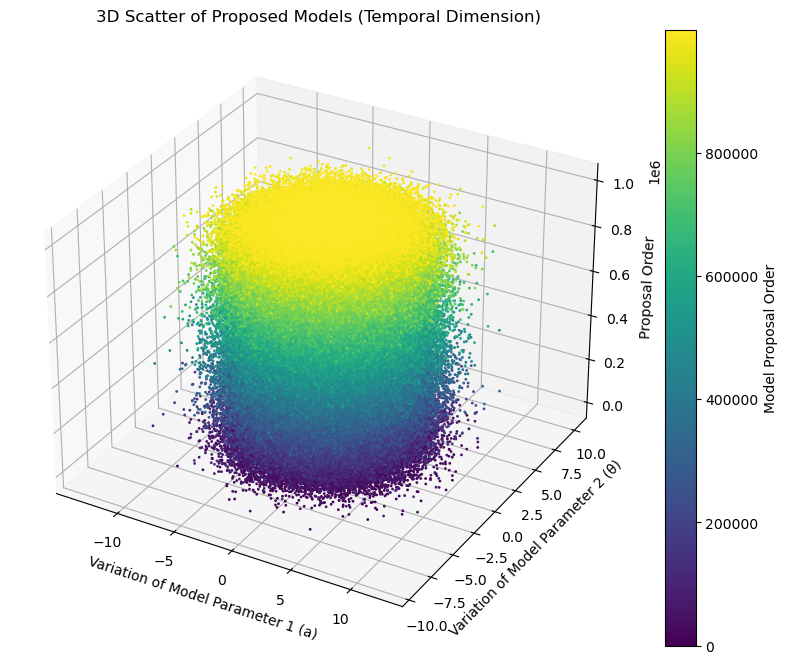

In [8]:
from GF7013.sampling.metropolis.proposal_normal import proposal_normal
from mpl_toolkits.mplot3d import Axes3D  
# N√∫mero de modelos propuestos
N_models = 1e6

# Matriz de covarianza de la distribuci√≥n de proposici√≥n
cov = np.array([[7, 0], [0, 4]])

rng = np.random.default_rng(42)  # Para reproducibilidad
m_0 = np.array([0, 0])  # Modelo inicial
proposal = proposal_normal(cov=cov)

models = np.zeros((2, int(N_models)))
for i in range(int(N_models)):
    # Generar un modelo aleatorio
    models[:, i] = proposal.propose(m_0)

# Covarianza de la distribuci√≥n de proposici√≥n
cov_mod = np.cov(models)
# Imprimir la covarianza
print("Covarianza de la distribuci√≥n de proposici√≥n:")
print(cov_mod)

# Graficar los modelos propuestos
plt.figure(figsize=(8, 6))
# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear scatter 3D
N_models = models.shape[1]
scatter = ax.scatter(models[0, :], models[1, :], np.arange(N_models), 
                     c=np.arange(N_models), cmap='viridis', s=1, alpha=1)
ax.set_title('3D Scatter of Proposed Models (Temporal Dimension)')
ax.set_xlabel('Variation of Model Parameter 1 (a)')
ax.set_ylabel('Variation of Model Parameter 2 (Œ∏)')
ax.set_zlabel('Proposal Order')
fig.colorbar(scatter, ax=ax, label='Model Proposal Order')
plt.show()

### P3.1.2. Algoritmo de Metr√≥polis

Para esta parte se complet√≥ la implementaci√≥n del algoritmo de Metr√≥polis en el m√≥dulo `GF7013/sampling/metropolis/metropolis.py`. Esta implementaci√≥n permite recorrer el espacio de modelos mediante una cadena de Markov, aceptando o rechazando propuestas basadas en la raz√≥n de verosimilitud entre el modelo actual y el propuesto.

Se consideraron ambos enfoques para la evaluaci√≥n de verosimilitud:
1. **En escala normal**: utilizando directamente la funci√≥n de verosimilitud $\mathcal{L}(m)$ y la densidad a priori $f_{\text{prior}}(m)$.
2. **En escala logar√≠tmica**: utilizando $\log(\mathcal{L}(m))$ y $\log(f_{\text{prior}}(m))$, lo cual permite mayor estabilidad num√©rica, especialmente cuando los valores de verosimilitud son muy peque√±os.

Durante la ejecuci√≥n, el algoritmo sigue los siguientes pasos:

- Se inicializa con un modelo $m_0$.
- En cada iteraci√≥n, se genera un modelo de prueba $m_{\text{test}}$ a partir del modelo actual usando la distribuci√≥n de propuesta (`proposal_normal`) cuyo funcionamiento fue explicado en la pregunta anterior.


El c√≥digo fue probado en el script `Tarea2/tests/test_metropolis.py`, donde se utiliz√≥ una funci√≥n de verosimilitud bimodal compuesta por la suma de dos distribuciones con distinto centro: una normal y otra tipo Laplace, con diferente dispersi√≥n y forma. El modelo inicial se fij√≥ en $m_0 = -10$ y la distribuci√≥n a priori fue uniforme en un intervalo amplio que cubre ambas modas.

Los resultados muestran que el algoritmo logra muestrear una de las modas, pero tiene dificultades para explorar ambas regiones de manera consistente, especialmente al repetir el experimento con diferentes semillas aleatorias. Esto es esperable en cadenas de Metr√≥polis cuando las modas est√°n muy separadas y la propuesta es poco dispersa.

Para mejorar la exploraci√≥n, se podr√≠an ajustar par√°metros como el n√∫mero de muestras, la varianza de la propuesta, o utilizar m√©todos de remuestreo.



[-3.81230823 -3.81893513 -3.663309   ... 13.930803   14.48598517
 15.10435962]
[0.16083847 0.16048828 0.16842806 ... 0.74454026 0.49077156 0.26443733]


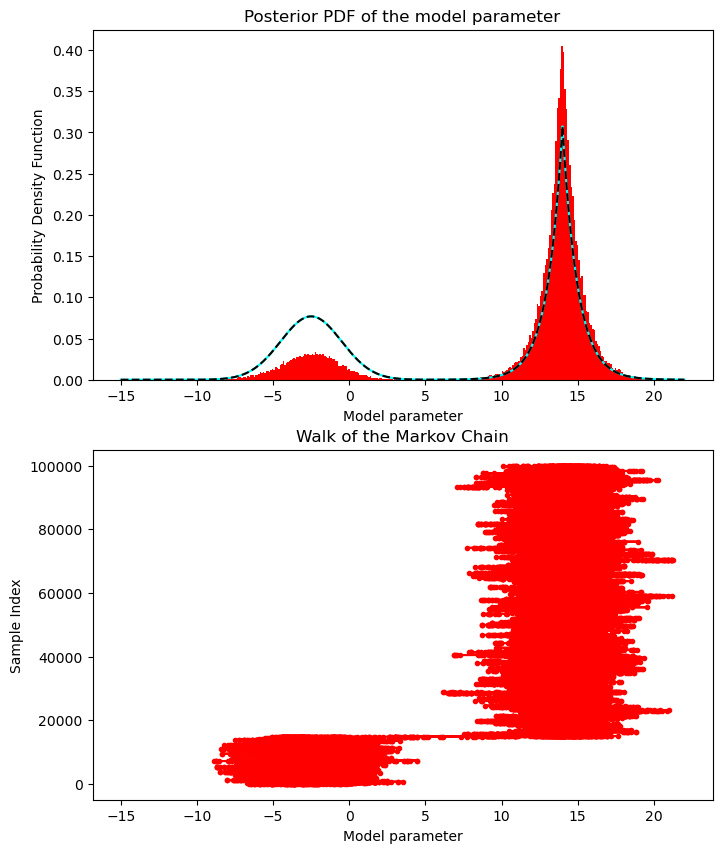

In [11]:
from GF7013.sampling.metropolis import metropolis
class pdf_bimodal(object):
    def __init__(self,  x_0, sigma_0, p_0, x_1, sigma_1, p_1):
        self.args_f0 = (x_0, sigma_0, p_0)
        self.args_f1 = (x_1, sigma_1, p_1)

    def __f(self, x, mean, sigma, p):
        alpha = 1 / sigma / np.sqrt(2*np.pi)
        return alpha * np.exp(-0.5*(np.sum(np.abs((x - mean)/sigma)**p)))

    def likelihood(self, x):
        return self.__f(x, *self.args_f0) + self.__f(x, *self.args_f1)
    
    def log_likelihood(self, x):
        return np.log(self.likelihood(x))


### MAIN CODE OF THE EXAMPLE.
NumBins = 100
# define the fdp to sample using SIR resampling
x_0 = -2.5
sigma_0 = 2.0
p_0 = 2

x_1 = 14 #9 #7.5
sigma_1 = 0.5#0.1 #0.75
p_1 = 1

# crear instancia de la pdf que usar√° como funcion de verosimilitud
f = pdf_bimodal(x_0, sigma_0, p_0, x_1, sigma_1, p_1)

# evaluate the pdf for later plot
x_min = -15
x_max = 22
Num_x = 10000
x_eval = np.linspace(x_min, x_max, Num_x)
f_values = np.array([f.likelihood(aux) for aux in x_eval])
dx = x_eval[1] - x_eval[0]
f_area = np.sum(f_values)*dx # rectangle integration

# define prior distribution
x_min_ini = -12
x_max_ini = 22
prior_pdf_pars = {}
prior_pdf_pars['lower_lim'] = np.array([x_min_ini])
prior_pdf_pars['upper_lim'] = np.array([x_max_ini])
fprior = pdf_uniform_nD(par=prior_pdf_pars)

# define proposal distribution
sigma_prop = (x_max_ini - x_min_ini)/100
proposal_params = {}
proposal_params['cov'] = np.array([[sigma_prop]]) # 2D array!!
proposal_pdf = proposal_normal(proposal_params['cov'])

# define initial model:
m0 = np.array([-10]) # 1D array!!!

# define initial models as samples from U(x_min, x_max)
NumSamples = int(1E5)
NumBurnIn = int(0.1 * NumSamples)
use_log_likelihood = False
#############
# YOU CAN TRY DIFFERENT VALUES OF BETA and see what happens!
beta = 1
#############
results = metropolis(m0= m0, 
                        likelihood_fun = f, 
                        pdf_prior = fprior, 
                        proposal = proposal_pdf, 
                        num_samples = NumSamples,
                        num_burnin = NumBurnIn,
                        use_log_likelihood = use_log_likelihood,
                        save_samples = True,
                        beta = beta)

print(results['samples'].m_set.flatten())
print(results['samples'].f)

f_values_beta = np.array([f.likelihood(aux)**beta for aux in x_eval])
dx = x_eval[1] - x_eval[0]
f_area_beta = np.sum(f_values_beta)*dx # rectangle integration
fig = plt.figure(1)
fig.set_size_inches((8,10))
ax1 = fig.add_subplot(211)
ax1.plot(x_eval, f_values/f_area, label = 'Bimodal PDF', color = 'cyan')
ax1.plot(x_eval, f_values_beta/f_area_beta, '--k', label = 'Bimodal PDF')
ax1.hist(results['samples'].m_set.flatten(), density = True, bins = 300, 
        color = 'red')
ax1.set_title('Posterior PDF of the model parameter')
ax1.set_xlabel('Model parameter')
ax1.set_ylabel('Probability Density Function')
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(results['samples'].m_set.flatten(), range(NumSamples), '.-r')
ax2.set_xlabel('Model parameter')
ax2.set_ylabel('Sample Index')
ax2.set_title('Walk of the Markov Chain')
plt.show()


## P3.2. Aplicaci√≥n al Problema de Ajuste Ortogonal a la Recta
En esta secci√≥n se aplic√≥ el algoritmo de Metr√≥polis para resolver un problema inverso cl√°sico: el ajuste ortogonal a la recta. El objetivo fue estimar los par√°metros del modelo $m = (a, \theta)$ que mejor explican las observaciones sint√©ticas generadas con incertidumbre en ambas direcciones ($x$ y $y$).

Configuraci√≥n del problema
Se definieron los siguientes elementos:

Una distribuci√≥n a priori uniforme sobre un dominio amplio:
$a \in [-15, 15]$, $\theta \in [-360^\circ, 360^\circ]$, asegurando cobertura completa del espacio de b√∫squeda.

Una distribuci√≥n de propuesta gaussiana sim√©trica con perturbaciones peque√±as:
$\text{Cov} = \text{diag}(0.1, 5.0)$, lo que favorece una exploraci√≥n local controlada en torno al modelo actual.

El modelo inicial $m_0 = [-10, -300]$ se eligi√≥ intencionalmente lejos de la soluci√≥n esperada para evaluar la capacidad del algoritmo de converger correctamente.

Se utiliz√≥ la versi√≥n logar√≠tmica de la funci√≥n de verosimilitud para mayor estabilidad num√©rica, como se justific√≥ previamente.

Resultados
El algoritmo fue ejecutado con 30,000 muestras y un burn-in de 3,000. Se graficaron:

La traza de la cadena $a$ vs. $\theta$, que mostr√≥ convergencia hacia una regi√≥n compacta del espacio.

Los histogramas marginales para $a$ y $\theta$, con densidades bien definidas y unimodales.

Finalmente, se identific√≥ el mejor modelo seg√∫n el valor de posterior, y se grafic√≥ sobre los datos con el error de cada punto. La recta obtenida muestra un ajuste visualmente correcto y coherente con los datos observados.


Mejor modelo encontrado: a = 2.83, Œ∏ = -315.02


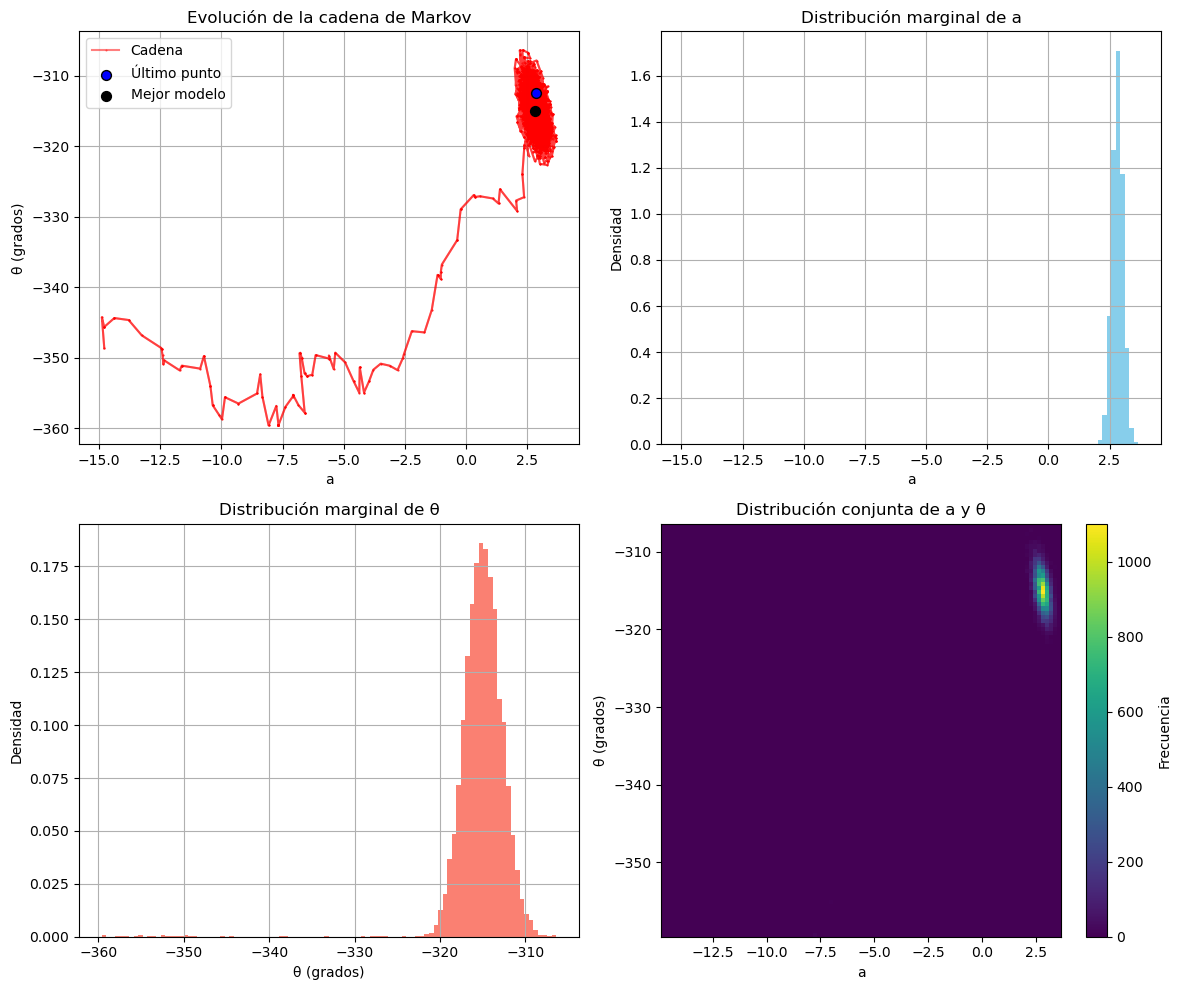

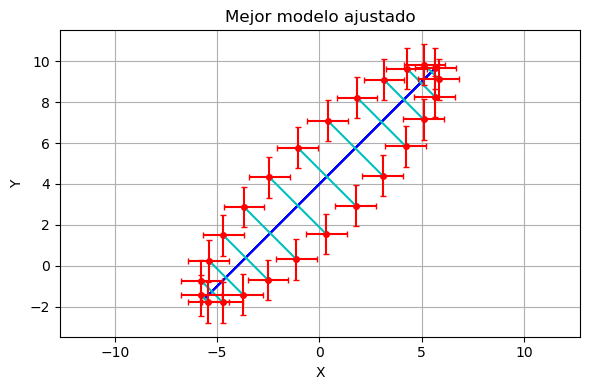

In [15]:
from GF7013.bin.Tarea2.P32.datos import obtener_datos_elipses

# === 1. Generar datos sint√©ticos ===
N = 25
x_obs, y_obs, sigma_x, sigma_y = obtener_datos_elipses(
    N=N,
    a=8, b=2,
    alpha=45,
    deltax=0, deltay=4,
    sigma_x=1.0, sigma_y=1.0
)

# === 2. Definir modelo directo y verosimilitud ===
modelo_forward = forward(x_obs, y_obs, sigma_x, sigma_y)

param_likelihood = {
    'mu': np.zeros(N),
    'cov': np.eye(N)
}
pdf_datos = pdf_normal(param_likelihood)

L = likelihood_function(modelo_forward, pdf_datos)

# === 3. Prior uniforme ===
prior_params = {
    'lower_lim': np.array([-15.0, -360.0]),
    'upper_lim': np.array([15.0, 360.0])
}
prior = pdf_uniform_nD(prior_params)

# === 4. Propuesta gaussiana ===
proposal = proposal_normal(cov=np.diag([0.1, 5.0]))  # ajustable

# === 5. Modelo inicial y ejecuci√≥n Metropolis ===
m0 = np.array([-15.0, -350.0])  # lejos de la soluci√≥n verdadera

res = metropolis(
    m0=m0,
    likelihood_fun=L,
    pdf_prior=prior,
    proposal=proposal,
    num_samples=30000,
    num_burnin=0,
    use_log_likelihood=True,
    save_samples=True,
    beta=1
)

samples = res['samples'].m_set
a_vals = samples[:, 0]
theta_vals = samples[:, 1]

# === 6. Visualizaci√≥n de resultados ===

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Traza de la cadena (a vs. Œ∏)
axs[0, 0].plot(a_vals, theta_vals, '.-r', markersize=1, alpha=0.5)
axs[0, 0].set_xlabel('a')
axs[0, 0].set_ylabel('Œ∏ (grados)')
axs[0, 0].set_title('Evoluci√≥n de la cadena de Markov')
axs[0, 0].grid(True)

# Histograma marginal de a
axs[0, 1].hist(a_vals, bins=100, density=True, color='skyblue')
axs[0, 1].set_xlabel('a')
axs[0, 1].set_ylabel('Densidad')
axs[0, 1].set_title('Distribuci√≥n marginal de a')
axs[0, 1].grid(True)

# Histograma marginal de Œ∏
axs[1, 0].hist(theta_vals, bins=100, density=True, color='salmon')
axs[1, 0].set_xlabel('Œ∏ (grados)')
axs[1, 0].set_ylabel('Densidad')
axs[1, 0].set_title('Distribuci√≥n marginal de Œ∏')
axs[1, 0].grid(True)

# Histograma conjunto (a, Œ∏)
h = axs[1, 1].hist2d(a_vals, theta_vals, bins=100, cmap='viridis')
axs[1, 1].set_xlabel('a')
axs[1, 1].set_ylabel('Œ∏ (grados)')
axs[1, 1].set_title('Distribuci√≥n conjunta de a y Œ∏')
fig.colorbar(h[3], ax=axs[1, 1], label='Frecuencia')


# Traza de la cadena (a vs. Œ∏)
axs[0, 0].plot(a_vals, theta_vals, '.-r', markersize=1, alpha=0.5, label='Cadena')
# Punto final en otro color
axs[0, 0].scatter(a_vals[-1], theta_vals[-1], color='blue', s=50, label='√öltimo punto', edgecolors='k', zorder=5)
axs[0, 0].set_xlabel('a')
axs[0, 0].set_ylabel('Œ∏ (grados)')
axs[0, 0].set_title('Evoluci√≥n de la cadena de Markov')
axs[0, 0].grid(True)



# === 7. Mostrar mejor modelo encontrado ===
i_best = np.argmax(res['samples'].f)
mejor_modelo = res['samples'].m_set[i_best, :]
print(f"\nMejor modelo encontrado: a = {mejor_modelo[0]:.2f}, Œ∏ = {mejor_modelo[1]:.2f}")
# Mejor modelo encontrado 
axs[0, 0].scatter(a_vals[i_best], theta_vals[i_best], color='black', s=50, label='Mejor modelo', edgecolors='k', zorder=5)
axs[0, 0].legend()

plt.tight_layout()
plt.show()
# Graficar mejor recta sobre los datos
fig, ax = plt.subplots(figsize=(6, 4))
dsigma_r = modelo_forward.eval(mejor_modelo)  # distancias normalizadas
m1= dsigma_r[0]
m2= dsigma_r[1]

recta.plot_recta(ax,
                 *mejor_modelo,
                 x_obs=x_obs,
                 y_obs=y_obs,
                 color_dist='c',
                 color='b')

ax.errorbar(x=x_obs, y=y_obs, xerr=sigma_x, yerr=sigma_y, fmt='.r', capsize=2)
ax.axis('equal')

ax.set_title("Mejor modelo ajustado")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True)
plt.tight_layout()
plt.show()



## P4. Resoluci√≥n del problema inverso: Programaci√≥n del Algoritmo de Metropolis en Paralelo
En esta etapa de la tarea se programar√° y verificar√° el algoritmo de Metropolis en Paralelo. Para ello, utilizando como base el algoritmo de Metropolis reci√©n programado, se programar√° una versi√≥n serial del algoritmo de Metropolis en paralelo, y por √∫ltimo una versi√≥n paralelizada utilizando multiprocessing.Pool.

---

## P4.1. Algoritmo de Metropolis en Paralelo (versi√≥n SERIAL)
Termine la programaci√≥n de los c√≥digos en el m√≥dulo GF7013/sampling/metropolis_in_parallel/metropolis_in_parallel_SERIAL.py.

---

## P4.2. Algoritmo de Metropolis en Paralelo (versi√≥n paralelizada)
Termine la programaci√≥n de los c√≥digos en el m√≥dulo GF7013/sampling/metropolis_in_parallel/metropolis_in_parallel_POOL.py (versi√≥n que comparte en multiprocessing.pool con cada chain).

---

## P4.3. Verificaci√≥n del algoritmo
Modifique los scripts de test `tests/test_metropolis.py` en tarea2/tests/test_metropolis_in_parallel_SERIAL.py y Tarea2/tests/test_metropolis_in_parallel_POOL.py. Modifique estos √∫ltimos para que corran usando la versi√≥n serial y paralelizada respectivamente.

---

## P4.4. Aplicaci√≥n al Problema de Ajuste Ortogonal a la Recta
Repita los pasos en P3.2, pero esta vez programando con modelos iniciales generados como muestras de propuestas. Desarrolle esta parte de la tarea en el carpeta Tarea2/P4.

---

Prof. Francisco H. Ortega Culaciati, Ph.D.  
Departamento de Geof√≠sica - FCFM - Universidad de Chile

---